In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.datasets import make_blobs
    

In [7]:
class Perceptron:
    
    """
    Initialize our perceptron object
    """
    def __init__(self):
        pass
    
    
    """
    Computes the score of our algorithm by checking if our guesses (y_hat) and the true
    values for y are equal, summing the resulting vector, and diviiding my the size of our
    matrix X.
    """
    def score(self, X, y):
        return np.sum((y == np.transpose(self.guess)))/(X.shape[0])
    
    
    """
    Computes the dot product of of X and w, assigns a value of 1 if the value is greater 
    than or equal to 0, and 0 otherwise
    """
    def predict(self, X):
        self.guess = (np.dot(self.X_, self.w_) >= 0).astype(int)

        
    '''
    The fit function is the main method of algorithm, initializing our history vector,
    creating our initial weights, as well as preparing our variables for computational 
    use by appending a column of ones to our matrix X and reshaping our weight vector w.
    '''
    def fit(self, X, y):
        self.history = []
        self.X_ = np.append(X, np.ones((X.shape[0], 1)), 1)
        self.w = np.random.rand(self.X_.shape[1]-1,1)
        bias = np.random.uniform(0, 1)
        self.w_ = np.append(self.w, -bias)
        self.w_ = self.w_.reshape(3,1)
    
    
    """
    The perceptron update :
        1) Choose a random point in X
        2) Compute the dot product of the given point the current weight vector w
        3) If the dot product is less than 0 update w as follows:
            w^(t+1) = w^t + (2*y_i-1) * X_i
    """
    def perceptron_update(self, X, y, w):
        self.w_ = self.w_[:,0].reshape(self.X_.shape[1],1)
        #self.w_ = self.w_[:,0].reshape(3,1)
        for i in range(self.X_.shape[0]-1):
            val = np.random.randint(0, X.shape[0]-1)
            instance = self.X_[val]
            if np.dot(instance, self.w_) < 0:
                self.w_ = self.w_ + ((2*y[val]-1)*self.X_[val]).reshape(self.X_.shape[1],1)
                self.w_ = self.w_/np.linalg.norm(self.w_)
                break
            

In [4]:
w = np.random.sample(2,)
bias = np.random.uniform(-1, 1)
w_ = np.append(w, bias)
X_ = np.append(X, np.ones((X.shape[0], 1)), 1)
ting = (np.dot(X_, w_) >= 0)

print(X.shape[0])

NameError: name 'p_features' is not defined

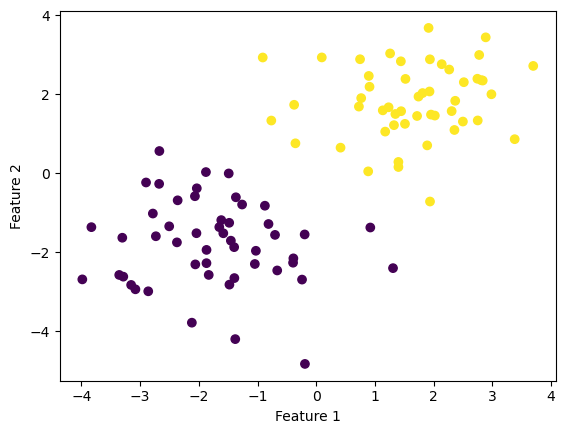

In [5]:
np.random.seed(945)

n = 100
p_features = 3

X, y = make_blobs(n_samples = 100, n_features = p_features - 1, centers = [(-1.7, -1.7), (1.7, 1.7)])

fig = plt.scatter(X[:,0], X[:,1], c = y)
xlab = plt.xlabel("Feature 1")
ylab = plt.ylabel("Feature 2")



In [9]:
p = Perceptron()   
p.fit(X, y)
for i in range(100):
    p.predict(p.X_)
    score = p.score(X, y)
    p.history.append(score)
    if score == 1:
        break
    elif score < 1:
        p.perceptron_update(p.X_, y, p.w_)
    
print("final score: " + str(score))

final score: 1.0


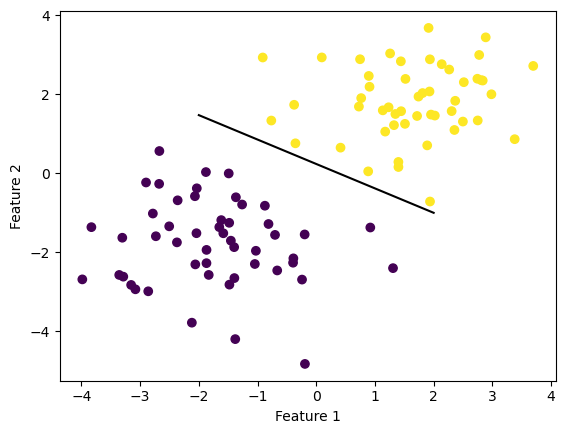

In [10]:
def draw_line(w, x_min, x_max):
  x = np.linspace(x_min, x_max, 101)
  y = -(w[0]*x + w[2])/w[1]
  plt.plot(x, y, color = "black")

fig = plt.scatter(X[:,0], X[:,1], c = y)
draw_line(p.w_, -2, 2)

xlab = plt.xlabel("Feature 1")
ylab = plt.ylabel("Feature 2")
